In [1]:
from fastai import *

In [2]:
n=100

In [3]:
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[:5]

tensor([[-0.6092,  1.0000],
        [ 0.5887,  1.0000],
        [ 0.1574,  1.0000],
        [-0.4364,  1.0000],
        [-0.5055,  1.0000]])

In [4]:
a = tensor(3.,2)

In [5]:
y = x@a + torch.rand(n)*3; y

tensor([ 1.7731,  3.7896,  4.0558,  3.4664,  1.5166,  0.8149,  6.0116,  5.1212,
         6.4491,  2.9241,  1.1032,  6.4040,  1.3405,  2.8596,  2.0950,  3.5884,
         1.5981,  3.3720,  1.0941,  6.4091,  4.2880,  4.4945,  3.2504,  0.1805,
         5.5352,  1.6762,  3.0696,  4.2607,  3.9282,  1.3673,  5.6004,  2.1761,
         1.4066,  4.0514,  4.5454,  1.3419,  3.1090,  3.2325,  3.6395,  3.6682,
         6.8643,  1.2006,  4.2706,  4.3402,  1.0369,  4.6715,  6.0175,  4.4609,
         5.5728,  0.7178,  2.3536,  6.3245,  2.1229,  7.5227,  4.9780,  2.7702,
         3.4010,  3.0220,  3.7091,  5.3405,  4.5145,  2.4737,  2.8677,  1.9525,
         1.1743,  0.4333,  2.6392,  4.2224,  4.1307,  1.4183,  0.4772,  4.8845,
         2.5563,  5.5570,  3.3873,  2.2884,  1.5177,  4.1808,  3.3513,  1.7265,
         2.0365,  1.1052,  5.9504,  7.1018,  1.8459,  0.8380,  7.5680,  6.9442,
         4.8211,  1.6369,  2.5553,  5.1541,  5.9860, -0.1491,  4.5355,  3.7085,
         3.9470,  4.6622,  6.5548,  6.00

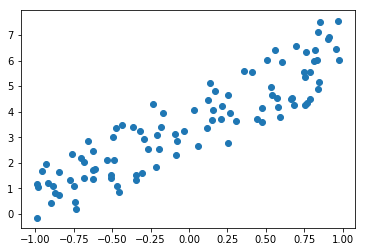

In [6]:
plt.scatter(x[:,0], y)

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [8]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(12.2935)

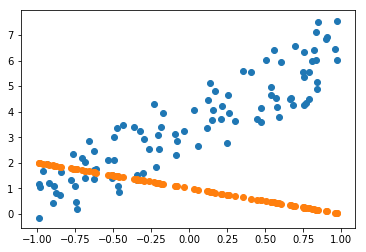

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [11]:
a = nn.Parameter(a)

In [12]:
def update():
    y_hat = x@a #forward!
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(12.2935, grad_fn=<MeanBackward1>)
tensor(1.8303, grad_fn=<MeanBackward1>)
tensor(0.8905, grad_fn=<MeanBackward1>)
tensor(0.7108, grad_fn=<MeanBackward1>)
tensor(0.6739, grad_fn=<MeanBackward1>)
tensor(0.6663, grad_fn=<MeanBackward1>)
tensor(0.6648, grad_fn=<MeanBackward1>)
tensor(0.6644, grad_fn=<MeanBackward1>)
tensor(0.6644, grad_fn=<MeanBackward1>)
tensor(0.6644, grad_fn=<MeanBackward1>)


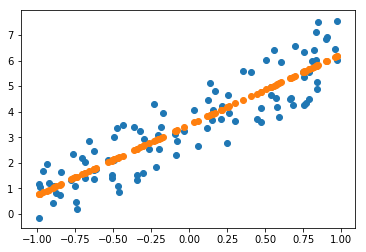

In [14]:
y_hat = x@a
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [15]:
a

Parameter containing:
tensor([2.7563, 3.4847], requires_grad=True)

In [16]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [22]:
a = nn.Parameter(tensor(-2.,6))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=45)